# Issue #3 - Traversal of the space of train/test splits

In designing classifiers, models are developed on a training set. But how does one divide a dataset into training and test sets? With few training data, our parameter estimates will have greater variance, whereas with few test data, our performance statistic will have greater variance. What is the compromise? From application or total number of exemplars in the dataset, we usually split the dataset into training (60 to 80%) and testing (40 to 20%) without any principled reason.

### Objective 
We want to investigate how much the performance score computed on the test set depends on the choice of train/test split proportion. Eg. how would our performance estimate change if we used a 60/40 split rather than 80/20?

### Methodolgy
We build a function that takes a scikit-learn estimator([Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) and a [dataset](https://github.com/elie-wanko/PRESC/blob/master/datasets/defaults.csv), then compute an evaluation metric over a grid of train/test split proportions from 0 to 100%. To assess variability, for each split proportion we should resplit and recompute the metric multiple times. A prepliminary analysis of our data set (defaults.csv) can be referenced [here](https://github.com/elie-wanko/PRESC/blob/Issue%232-Train_and_test_a_classification_model/dev/elie_wanko/Issue%20%232%20-%20Train%20and%20test%20a%20classification%20model.ipynb)

### EDA
#### Importing Libraries

In [1]:
# Basic Computations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Dynamic Markdowns
from IPython.display import Markdown as md

In [2]:
#**Adding module’s sub-directory to Pythons path**
import os
import sys
sys.path.insert(0, os.path.abspath('../elie_wanko/modules'))
import helpers, summary

#### Data Pre-Processing

In [3]:
df_data = pd.read_csv("defaults_data.csv")
df_data.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Analysis

In our analysis, we are considering the following train/test split proportions shown in the table below.

In [4]:
test_sizes = np.arange(5, 100, 5)
tt_sizes = np.array([(lambda x: [100-x, x])(x) for x in test_sizes])
pd.DataFrame(tt_sizes, range(len(tt_sizes)), ["Training Sizes", "Testing Sizes"]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Training Sizes,95,90,85,80,75,70,65,60,55,50,45,40,35,30,25,20,15,10,5
Testing Sizes,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95


**Results**

In [5]:
ttsplits_summary = summary.ttsplits(data=df_data, sizes=test_sizes)
ttsplits_summary.style.apply(helpers.highlight_max)

,Test Size,Accuracy Score,Precision Score,Recall Score,F1 Score
0,5,0.800000,1.000000,0.500000,0.666700
1,10,0.900000,1.000000,0.500000,0.666700
2,15,0.866700,1.000000,0.333300,0.500000
3,20,0.850000,1.000000,0.250000,0.400000
4,25,0.880000,1.000000,0.250000,0.400000
5,30,0.900000,1.000000,0.250000,0.400000
6,35,0.885700,1.000000,0.200000,0.333300
7,40,0.900000,1.000000,0.200000,0.333300
8,45,0.888900,0.500000,0.200000,0.285700
9,50,0.900000,0.500000,0.200000,0.285700


Text(0, 0.5, 'Scores')

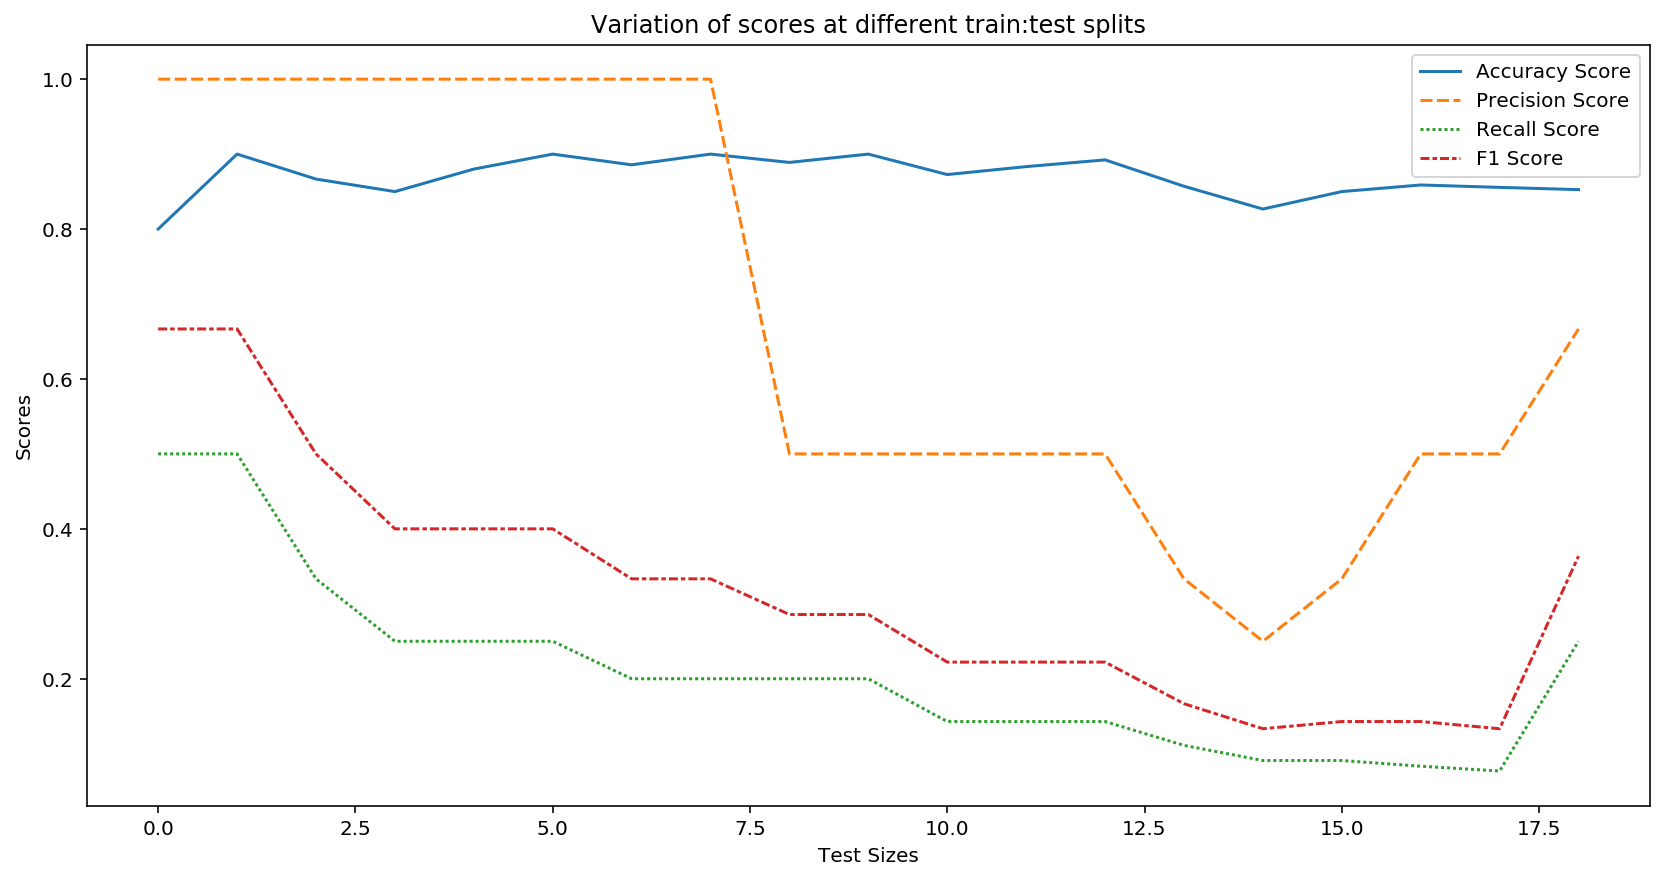

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=ttsplits_summary.filter(ttsplits_summary.columns[1:]))
# plt.xscale(5)
plt.title("Variation of scores at different train:test splits")
plt.xlabel("Test Sizes")
plt.ylabel("Scores")

### Conclusions

From our observations, we can see that the best results are gotten when we have a train:test split ratio of 90:10, as shown in green on our table. This is similary observed on our line graph above. Thereafter, scores gradually decrease except for the precision score which remains at 1.0 till we reach a test size of around 45%. The accuracy score remains at an average 0.8ish through out the analysis but we can't conclude anything out of it alone.

Our best model is there shown to be around a train:test split of 90:10. Further exploring a ratio in the neighborhood of our premimary analysis could help us polish our model.